Data preprocessing

In [168]:
import pandas as pd

In [169]:
train = pd.read_csv('/home/kikikita/Рабочий стол/CS_GO_test/data/train.csv')
train

,map_id,team1_id,team2_id,map_name,who_win
0,289,6665,7718,Ancient,0
1,715,4411,10577,Inferno,0
2,157,11251,9455,Nuke,1
3,524,4608,7532,Mirage,0
4,404,8637,6667,Overpass,1
...,...,...,...,...,...
708,709,6667,4773,Inferno,0
709,528,9215,5995,Ancient,1
710,163,4869,9565,Mirage,1
711,96,10426,4991,Nuke,1


In [170]:
players_feats = pd.read_csv('/home/kikikita/Рабочий стол/CS_GO_test/data/players_feats.csv')
players_feats

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,...,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_name,map_id
0,4954,90,42.2,112,0.80,76.3,5.9,6,156,0.58,...,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635
1,5794,45,60.0,57,0.79,82.3,10.9,3,68,0.66,...,96,54,34,1.59,1.17,70.4,16.7,7532,Ancient,635
2,4954,156,51.9,167,0.93,63.5,3.4,10,265,0.59,...,22,26,19,1.37,1.10,88.5,20.5,6665,Dust2,583
3,5794,449,53.5,427,1.05,86.7,13.1,23,618,0.73,...,104,62,49,1.27,1.10,79.0,17.4,7532,Dust2,583
4,7998,173,32.9,130,1.33,82.4,2.9,9,225,0.77,...,19,27,25,1.08,1.08,81.5,16.2,4608,Dust2,439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,9031,69,49.3,70,0.99,69.8,5.7,4,114,0.61,...,-1,16,18,0.89,1.11,75.0,21.4,10503,Ancient,284
1482,7716,104,55.8,113,0.92,71.6,5.9,6,172,0.60,...,4,33,34,0.97,1.30,75.8,28.4,7020,Vertigo,27
1483,12521,141,37.6,159,0.89,79.7,7.4,8,210,0.67,...,5,9,15,0.60,0.77,55.6,4.3,8297,Vertigo,27
1484,7716,155,58.7,154,1.01,71.1,7.9,10,246,0.63,...,35,30,17,1.76,1.39,83.3,22.9,7020,Ancient,237


In [171]:
team1_feats = train.merge(players_feats, how='left', left_on=['team1_id', 'map_id'], right_on=['team_id', 'map_id'])\
    .drop(['p1_id', 'p2_id', 'p3_id', 'p4_id', 'p5_id', 'team_id', 'map_name_y'], axis=1)
team1_feats.head()

,map_id,team1_id,team2_id,map_name_x,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,...,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds
0,289,6665,7718,Ancient,0,258,36.0,293,0.88,71.1,...,1.21,0.74,210,55,55,33,1.67,1.18,83.6,19.7
1,715,4411,10577,Inferno,0,178,39.3,208,0.86,64.1,...,0.92,0.61,186,-23,47,49,0.96,1.01,74.5,16.3
2,157,11251,9455,Nuke,1,494,52.8,397,1.24,94.0,...,1.04,0.64,150,8,11,21,0.52,0.73,81.8,5.0
3,524,4608,7532,Mirage,0,474,29.1,304,1.56,86.9,...,1.20,0.75,261,66,74,57,1.30,1.18,81.1,20.3
4,404,8637,6667,Overpass,1,217,55.8,248,0.88,64.8,...,1.10,0.73,78,11,20,17,1.18,1.09,80.0,17.0


In [172]:
team2_feats = train.merge(players_feats, how='left', left_on=['team2_id', 'map_id'], right_on=['team_id', 'map_id'])\
    .drop(['p1_id', 'p2_id', 'p3_id', 'p4_id', 'p5_id', 'team_id', 'map_name_y'], axis=1)
team2_feats.head()

,map_id,team1_id,team2_id,map_name_x,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,...,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds
0,289,6665,7718,Ancient,0,126,46.0,117,1.08,71.7,...,0.75,0.55,75,-34,21,20,1.05,1.06,76.2,19.0
1,715,4411,10577,Inferno,0,523,53.0,525,1.00,67.2,...,1.43,0.78,197,90,64,25,2.56,1.39,75.0,23.3
2,157,11251,9455,Nuke,1,201,39.8,215,0.93,69.0,...,0.81,0.55,101,-32,32,35,0.91,1.09,53.1,15.5
3,524,4608,7532,Mirage,0,366,53.6,359,1.02,85.4,...,0.92,0.54,109,-13,15,21,0.71,0.82,73.3,7.9
4,404,8637,6667,Overpass,1,184,50.0,189,0.97,73.9,...,1.17,0.72,122,26,20,10,2.00,1.01,80.0,12.4


In [173]:
teams_feats = team1_feats.iloc[:,5:-1] - team2_feats.iloc[:,5:-1]
teams_feats

,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,...,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
0,132,-10.0,176,-0.20,-0.6,1.5,10,271,-0.12,0.07,...,0.31,0.46,0.19,135,89,34,13,0.62,0.12,7.4
1,-345,-13.7,-317,-0.14,-3.1,3.7,-20,-516,-0.07,0.05,...,-0.23,-0.51,-0.17,-11,-113,-17,24,-1.60,-0.38,-0.5
2,293,13.0,182,0.31,25.0,1.3,9,259,0.23,0.02,...,-0.08,0.23,0.09,49,40,-21,-14,-0.39,-0.36,28.7
3,108,-24.5,-55,0.54,1.5,-4.1,1,33,0.16,-0.05,...,0.25,0.28,0.21,152,79,59,36,0.59,0.36,7.8
4,33,5.8,59,-0.09,-9.1,1.2,4,115,-0.12,0.03,...,-0.03,-0.07,0.01,-44,-15,0,7,-0.82,0.08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,71,-5.2,134,-0.14,1.4,2.8,4,147,-0.03,-0.01,...,0.07,0.25,0.06,146,98,10,-6,0.75,-0.12,11.8
709,136,-9.5,54,0.68,24.5,1.9,5,122,0.29,-0.04,...,-0.29,0.84,0.69,27,-7,10,9,1.11,1.30,60.0
710,190,-5.1,232,-0.01,-6.1,2.2,14,385,-0.05,-0.01,...,0.26,0.28,0.16,189,107,53,30,0.43,0.19,1.7
711,236,-1.4,159,0.22,6.8,-2.2,10,241,0.14,-0.03,...,0.09,-0.03,-0.01,-121,-32,-12,-17,0.14,0.09,-6.9


In [174]:
train_feats = pd.concat([train, teams_feats], axis=1)
train_feats.head()

,map_id,team1_id,team2_id,map_name,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,...,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
0,289,6665,7718,Ancient,0,132,-10.0,176,-0.20,-0.6,...,0.31,0.46,0.19,135,89,34,13,0.62,0.12,7.4
1,715,4411,10577,Inferno,0,-345,-13.7,-317,-0.14,-3.1,...,-0.23,-0.51,-0.17,-11,-113,-17,24,-1.60,-0.38,-0.5
2,157,11251,9455,Nuke,1,293,13.0,182,0.31,25.0,...,-0.08,0.23,0.09,49,40,-21,-14,-0.39,-0.36,28.7
3,524,4608,7532,Mirage,0,108,-24.5,-55,0.54,1.5,...,0.25,0.28,0.21,152,79,59,36,0.59,0.36,7.8
4,404,8637,6667,Overpass,1,33,5.8,59,-0.09,-9.1,...,-0.03,-0.07,0.01,-44,-15,0,7,-0.82,0.08,0.0


In [175]:
#смотрим пустые значения
missing_data = train_feats.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

map_id
False    713
Name: map_id, dtype: int64
 
team1_id
False    713
Name: team1_id, dtype: int64
 
team2_id
False    713
Name: team2_id, dtype: int64
 
map_name
False    713
Name: map_name, dtype: int64
 
who_win
False    713
Name: who_win, dtype: int64
 
p1_total_kills
False    713
Name: p1_total_kills, dtype: int64
 
p1_headshots
False    713
Name: p1_headshots, dtype: int64
 
p1_total_deaths
False    713
Name: p1_total_deaths, dtype: int64
 
p1_kd_ratio
False    713
Name: p1_kd_ratio, dtype: int64
 
p1_damage_per_round
False    713
Name: p1_damage_per_round, dtype: int64
 
p1_grenade_damage_per_round
False    713
Name: p1_grenade_damage_per_round, dtype: int64
 
p1_maps_played
False    713
Name: p1_maps_played, dtype: int64
 
p1_rounds_played
False    713
Name: p1_rounds_played, dtype: int64
 
p1_kills_per_round
False    713
Name: p1_kills_per_round, dtype: int64
 
p1_assists_per_round
False    713
Name: p1_assists_per_round, dtype: int64
 
p1_deaths_per_round
False    713
Name: 

In [176]:
train_feats = train_feats.fillna(0)

In [177]:
train_feats.to_csv('train_feats.csv')

Training model

In [178]:
import catboost

In [179]:
import pandas as pd
import numpy as np
import os
np.set_printoptions(precision=4)
import catboost
from catboost import *

In [180]:
X = train_feats.drop(['who_win'], axis=1).astype('string')
y = train_feats.who_win.astype('int64')

In [181]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]


In [182]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 386, One count = 327


In [183]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [184]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


In [185]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
#     verbose=5, #через сколько шагов выводится информация по итерациям
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.1714
0:	learn: 0.6797499	test: 0.6922327	best: 0.6922327 (0)	total: 7.07ms	remaining: 99ms
1:	learn: 0.6587242	test: 0.6902033	best: 0.6902033 (1)	total: 14.5ms	remaining: 94ms
2:	learn: 0.6400693	test: 0.6813675	best: 0.6813675 (2)	total: 21.9ms	remaining: 87.7ms
3:	learn: 0.6274707	test: 0.6770886	best: 0.6770886 (3)	total: 27.7ms	remaining: 76.1ms
4:	learn: 0.6135881	test: 0.6813281	best: 0.6770886 (3)	total: 35.2ms	remaining: 70.4ms
5:	learn: 0.6014505	test: 0.6807551	best: 0.6770886 (3)	total: 42ms	remaining: 63ms
6:	learn: 0.5976958	test: 0.6832434	best: 0.6770886 (3)	total: 47.2ms	remaining: 53.9ms
7:	learn: 0.5816383	test: 0.6881870	best: 0.6770886 (3)	total: 53.5ms	remaining: 46.8ms
8:	learn: 0.5753374	test: 0.6877854	best: 0.6770886 (3)	total: 60ms	remaining: 40ms
9:	learn: 0.5679974	test: 0.6873527	best: 0.6770886 (3)	total: 66.3ms	remaining: 33.2ms
10:	learn: 0.5542729	test: 0.6852048	best: 0.6770886 (3)	total: 72.7ms	remaining: 26.4ms
11:	learn: 0.54

In [186]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [187]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 100
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.1

cv_data = cv(
    params = params, #параметры модели
    pool = Pool(X, label=y, cat_features=cat_features), #датасет на котором хотим обучаться
    fold_count=5, #число фолдов, на которые бьем датасет(сколько будет одновременных обучений)
    shuffle=True, #перемешивание датасета перед разбиением
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.6770197621
bestIteration = 9

Training on fold [1/5]

bestTest = 0.6753826729
bestIteration = 5

Training on fold [2/5]

bestTest = 0.6565221368
bestIteration = 62

Training on fold [3/5]

bestTest = 0.6883634651
bestIteration = 4

Training on fold [4/5]

bestTest = 0.6576513267
bestIteration = 29



In [188]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.690655,0.002767,0.679727,0.004358,0.545228,0.045398
1,1,0.688039,0.004317,0.671722,0.006394,0.567593,0.056390
2,2,0.684052,0.005698,0.660337,0.006764,0.586562,0.038997
3,3,0.680993,0.005764,0.651751,0.010126,0.603318,0.035386
4,4,0.678888,0.006949,0.643358,0.008957,0.612812,0.037324


In [189]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])
#выводит значение лучшего Logloss + std на шаге
print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.6779±0.0093 on step 7


In [190]:
model_with_early_stop = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20 #если на протяжении 20 итераций, ошибка не уменьшается - остановка обучения
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [191]:
print(model_with_early_stop.tree_count_)

14


In [192]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC', #метрика по которой происходит остановка обучения
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [193]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [194]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool) #возвращает ROC кривую
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

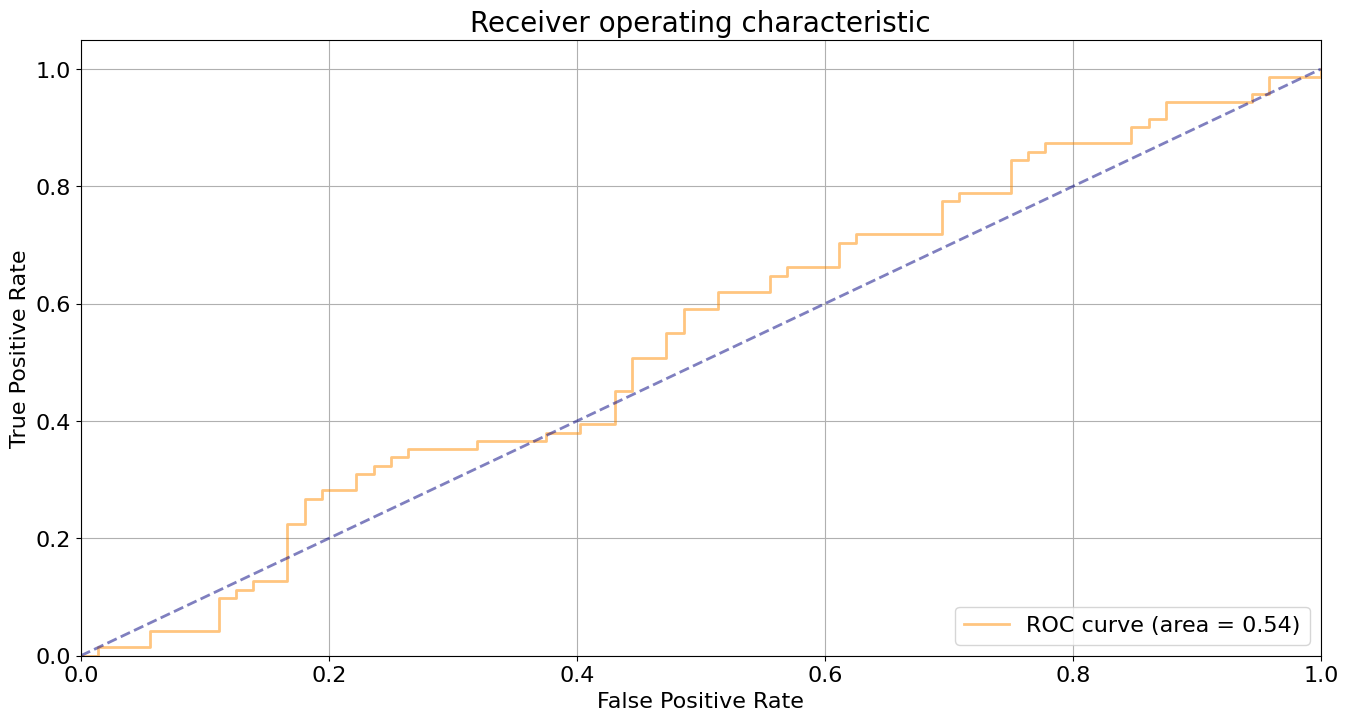

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [196]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

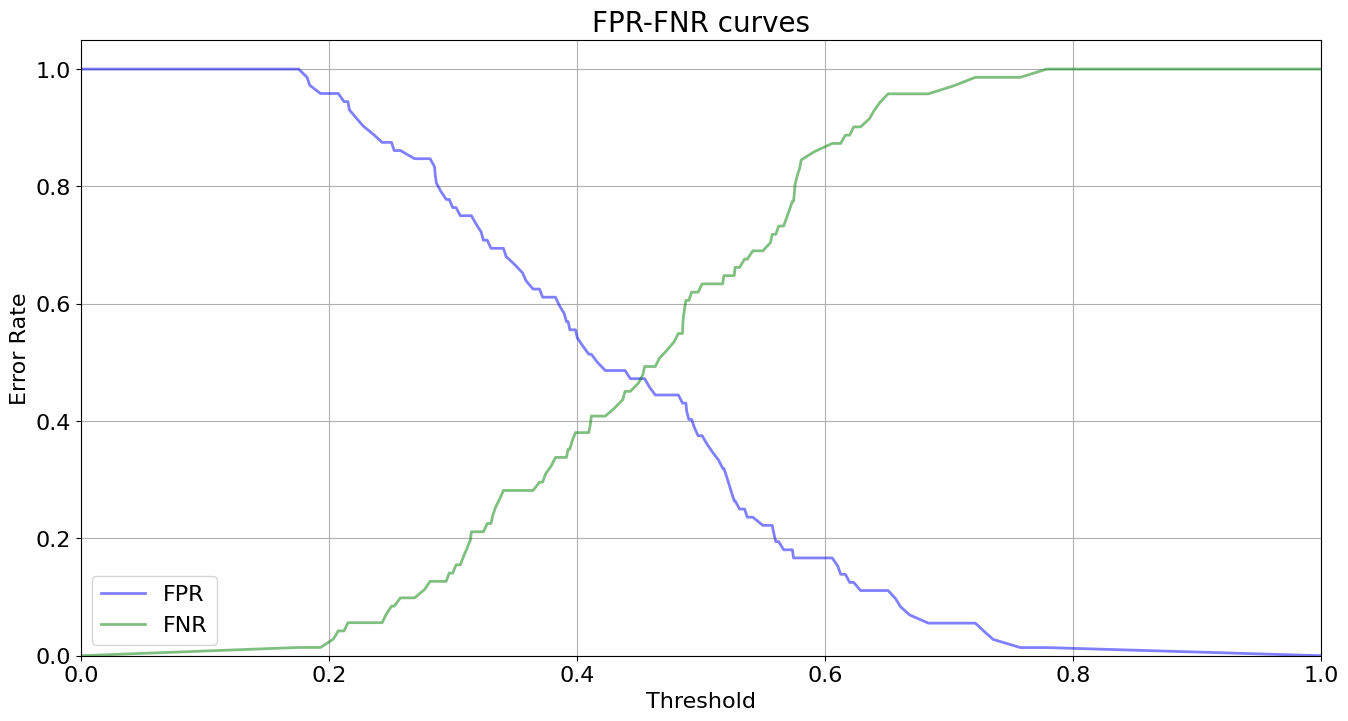

In [197]:
plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [198]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01)) #хотим ошибаться в 1% объектов положительного класса
print(select_threshold(model=model, data=eval_pool, FPR=0.01)) #хотим меньше ошибаться в определении объектов отрицательного класса

0.0
1.0


In [199]:
print(model.predict_proba(X=X_validation))

[[0.632  0.368 ]
 [0.794  0.206 ]
 [0.6687 0.3313]
 [0.4245 0.5755]
 [0.5325 0.4675]
 [0.2746 0.7254]
 [0.4727 0.5273]
 [0.6055 0.3945]
 [0.6085 0.3915]
 [0.8191 0.1809]
 [0.4549 0.5451]
 [0.7065 0.2935]
 [0.7988 0.2012]
 [0.3894 0.6106]
 [0.6582 0.3418]
 [0.4829 0.5171]
 [0.4304 0.5696]
 [0.4818 0.5182]
 [0.2825 0.7175]
 [0.6697 0.3303]
 [0.7127 0.2873]
 [0.691  0.309 ]
 [0.3609 0.6391]
 [0.4392 0.5608]
 [0.6057 0.3943]
 [0.6856 0.3144]
 [0.7148 0.2852]
 [0.7218 0.2782]
 [0.5125 0.4875]
 [0.4734 0.5266]
 [0.4212 0.5788]
 [0.5888 0.4112]
 [0.5391 0.4609]
 [0.628  0.372 ]
 [0.5082 0.4918]
 [0.3386 0.6614]
 [0.5038 0.4962]
 [0.3512 0.6488]
 [0.378  0.622 ]
 [0.6443 0.3557]
 [0.2246 0.7754]
 [0.5751 0.4249]
 [0.6962 0.3038]
 [0.4638 0.5362]
 [0.385  0.615 ]
 [0.5912 0.4088]
 [0.6747 0.3253]
 [0.4425 0.5575]
 [0.7733 0.2267]
 [0.3897 0.6103]
 [0.6558 0.3442]
 [0.5111 0.4889]
 [0.4193 0.5807]
 [0.6985 0.3015]
 [0.7016 0.2984]
 [0.5622 0.4378]
 [0.5066 0.4934]
 [0.66   0.34  ]
 [0.4769 0.523

In [200]:
print(model.predict(data=X_validation))

[0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1]


In [201]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=50
)

0:	learn: 0.6759973	total: 7.74ms	remaining: 766ms
50:	learn: 0.3850748	total: 319ms	remaining: 306ms
99:	learn: 0.2394284	total: 706ms	remaining: 0us


In [243]:
metrics = best_model.eval_metrics(
    data=Pool(X, label=y, cat_features=cat_features),
    metrics=['Logloss','AUC', 'F1'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

CatBoostError: Invalid label type=<class 'str'>: must be array like.

In [203]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,team2_id,7.678954
1,team1_id,3.295339
2,p3_deaths_per_round,3.208700
3,p2_saved_teammates_per_round,3.094391
4,p1_maps_played,2.959264
...,...,...
118,p5_kill_round,0.000000
119,p5_kill_death_difference,0.000000
120,p5_total_opening_kills,0.000000
121,p5_opening_kill_rating,0.000000


In [204]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy', 'F1'],
    boosting_type='Plain', #тип бустинга
    bootstrap_type='Bernoulli', #тип сэмплирования
    subsample=0.5, #процент объектов, которые будут использоваться при построении дерева
    one_hot_max_size=20, 
    rsm=0.5,
    leaf_estimation_iterations=5, #5 раз считаем значения одного и того же дерева в листьях
    max_ctr_complexity=1) #комбинации фичей
    
fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [205]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [244]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=100
)

CatBoostError: Invalid label type=<class 'str'>: must be array like.

In [207]:
X_test = X_validation#.drop('y', axis=1).astype("string")
test_pool = Pool(data=X_test, cat_features=cat_features)
predictions = best_model.predict_proba(test_pool)
print('Predictoins:')
print(predictions)

Predictoins:
[[0.4591 0.5409]
 [0.7612 0.2388]
 [0.5103 0.4897]
 [0.6476 0.3524]
 [0.3773 0.6227]
 [0.551  0.449 ]
 [0.667  0.333 ]
 [0.4625 0.5375]
 [0.6099 0.3901]
 [0.6358 0.3642]
 [0.693  0.307 ]
 [0.775  0.225 ]
 [0.5113 0.4887]
 [0.4741 0.5259]
 [0.3882 0.6118]
 [0.5018 0.4982]
 [0.7459 0.2541]
 [0.6674 0.3326]
 [0.5417 0.4583]
 [0.5256 0.4744]
 [0.5134 0.4866]
 [0.4678 0.5322]
 [0.4782 0.5218]
 [0.5931 0.4069]
 [0.6395 0.3605]
 [0.4222 0.5778]
 [0.6012 0.3988]
 [0.584  0.416 ]
 [0.443  0.557 ]
 [0.5802 0.4198]
 [0.5493 0.4507]
 [0.4648 0.5352]
 [0.535  0.465 ]
 [0.6293 0.3707]
 [0.6482 0.3518]
 [0.5034 0.4966]
 [0.4388 0.5612]
 [0.5676 0.4324]
 [0.6517 0.3483]
 [0.8002 0.1998]
 [0.314  0.686 ]
 [0.5321 0.4679]
 [0.6233 0.3767]
 [0.5564 0.4436]
 [0.5738 0.4262]
 [0.5439 0.4561]
 [0.3222 0.6778]
 [0.4826 0.5174]
 [0.7624 0.2376]
 [0.554  0.446 ]
 [0.6671 0.3329]
 [0.4666 0.5334]
 [0.537  0.463 ]
 [0.6583 0.3417]
 [0.6356 0.3644]
 [0.3386 0.6614]
 [0.5822 0.4178]
 [0.4295 0.5705]
 

In [208]:
y_true = y_validation#pd.DataFrame(test_df.y)
y_pred = best_model.predict(test_pool)

In [209]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred))
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

0.5804195804195804
0.4444444444444444
0.6486486486486487
0.3380281690140845


In [210]:
#!apt-get install default-jre
#!java -version

In [211]:
import h2o

In [212]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 47 mins
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,kikikita
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.781 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [213]:
from h2o.automl import H2OAutoML

In [214]:
train_df = h2o.H2OFrame(train_feats)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [215]:
train_df.describe()

Rows:713
Cols:124

,map_id,team1_id,team2_id,map_name,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
type,int,int,int,enum,int,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real
mins,0.0,4411.0,4411.0,,0.0,-730.0,-51.6,-711.0,-2.78,-91.1,-13.3,-41.0,-1097.0,-0.97,-0.19,-0.74,-0.12,-0.14,-1.41,-2.8,-0.98,-372.0,-238.0,-108.0,-82.0,-19.14,-1.33,-100.0,-37.3,-698.0,-57.9,-660.0,-1.62,-84.5,-15.4,-36.0,-975.0,-0.77,-0.21999999999999997,-0.7,-0.16,-0.16,-1.17,-1.62,-0.85,-338.0,-150.0,-103.0,-106.0,-7.91,-1.36,-87.5,-25.5,-648.0,-60.5,-642.0,-1.64,-90.0,-9.6,-35.0,-947.0,-0.82,-0.15,-0.65,-0.11,-0.15,-1.33,-3.0,-0.9,-310.0,-140.0,-90.0,-93.0,-4.43,-1.32,-90.9,-23.8,-684.0,-55.0,-649.0,-1.72,-81.2,-13.8,-34.0,-921.0,-0.79,-0.17,-0.73,-0.17,-0.14,-1.31,-1.75,-1.05,-325.0,-167.0,-102.0,-114.0,-5.83,-1.83,-100.0,-31.2,-675.0,-54.1,-576.0,-1.17,-80.4,-16.7,-35.0,-913.0,-0.74,-0.15,-0.68,-0.13,-0.18000000000000002,-1.15,-1.97,-0.95,-296.0,-156.0,-85.0,-76.0,-3.52,-1.5,-100.0
mean,370.92566619915823,7243.643758765781,7787.844319775595,,0.4586255259467041,9.214586255259468,-0.6809256661991582,

In [225]:
train_df['who_win'] = train_df['who_win'].asfactor()
train_df['map_id'] = train_df['map_id'].asfactor()
train_df['team1_id'] = train_df['team1_id'].asfactor()
train_df['team2_id'] = train_df['team2_id'].asfactor()
train_df['map_name'] = train_df['map_name'].asfactor()

In [226]:
train_df.describe()

Rows:713
Cols:124

,map_id,team1_id,team2_id,map_name,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
type,enum,enum,enum,enum,enum,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real
mins,,,,,,-730.0,-51.6,-711.0,-2.78,-91.1,-13.3,-41.0,-1097.0,-0.97,-0.19,-0.74,-0.12,-0.14,-1.41,-2.8,-0.98,-372.0,-238.0,-108.0,-82.0,-19.14,-1.33,-100.0,-37.3,-698.0,-57.9,-660.0,-1.62,-84.5,-15.4,-36.0,-975.0,-0.77,-0.21999999999999997,-0.7,-0.16,-0.16,-1.17,-1.62,-0.85,-338.0,-150.0,-103.0,-106.0,-7.91,-1.36,-87.5,-25.5,-648.0,-60.5,-642.0,-1.64,-90.0,-9.6,-35.0,-947.0,-0.82,-0.15,-0.65,-0.11,-0.15,-1.33,-3.0,-0.9,-310.0,-140.0,-90.0,-93.0,-4.43,-1.32,-90.9,-23.8,-684.0,-55.0,-649.0,-1.72,-81.2,-13.8,-34.0,-921.0,-0.79,-0.17,-0.73,-0.17,-0.14,-1.31,-1.75,-1.05,-325.0,-167.0,-102.0,-114.0,-5.83,-1.83,-100.0,-31.2,-675.0,-54.1,-576.0,-1.17,-80.4,-16.7,-35.0,-913.0,-0.74,-0.15,-0.68,-0.13,-0.18000000000000002,-1.15,-1.97,-0.95,-296.0,-156.0,-85.0,-76.0,-3.52,-1.5,-100.0
mean,,,,,,9.214586255259468,-0.6809256661991582,12.022440392706882,-0.0033520336605890617,-0.6886395511921458,-0.07180925666199155,0

In [252]:
feats_train,feats_test,feats_valid = train_df.split_frame(ratios=[.7, .15], seed = 1234)

In [253]:
y = "who_win"
x = train_df.columns
x.remove(y)
# x.remove('team1_id')
# x.remove('team2_id')
x.remove('map_name')

In [254]:
aml = H2OAutoML(max_models = 20, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], nfolds=0, sort_metric = 'AUC')

In [255]:
aml.train(x = x, y = y, training_frame = feats_train, validation_frame=feats_valid)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_17_20221204_111142


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          7172                   1            3            2             2             4             3.16667

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.002114816042690116
RMSE: 0.04598712909815219
LogLoss: 0.04579653186590943
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9061292748928211
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      273  0    0        (0.0/273.0)
1      0    240  0        (0.0/240.0)
Total  273  240  0        (0.0/513.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.906129     1        139
max f2                       0.906129     1        139
max f0point5                 0.906129     1        139
max accuracy                 0.906129     1        139
max precision                0.966817     1        0
max recall                   0.906129     1        139
max specificity              0.966817     1        0
max absolute_mcc             0.906129     1        139
max min_per_class_accuracy   0.906129     1        139
max mean_per_class_accuracy  0.906129     1        139
max tns                      0.966817     273      0
max fns                      0.966817     219      0
max fps                      0.03052      273      372
max tps                      0.906129     240      139
max tnr                      0.966817     1        0
max fnr                      0.966817     0.9125   0
max fpr                      0.03052      1        372
max tpr                      0.906129     1        139

Gains/Lift Table: Avg response rate: 46,78 %, avg score: 46,87 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0409357                   0.966817           2.1375  2.1375             1                0.966817   1                           0.966817            0.0875          0.0875                     113.75   113.75             0.0875
2        0.0409357                   0.966804           0       2.1375             0                0          1                           0.966817            0               0.0875                     -100     113.75             0.0875
3        0.0721248                   0.96679            2.1375  2.1375             1                0.96679    1                           0.966805            0.0666667       0.154167                   113.75   113.75             0.154167
4        0.105263                    0.961912           2.1375  2.1375             1                0.9635     1                           0.965765            0.0708333       0.225                      113.75   113.75             0.225
5        0.150097                    0.95908            2.1375  2.1375             1                0.960871   1                           0.964303            0.0958333       0.320833                   113.75   113.75             0.320833
6        0.20078                  

In [235]:
lb = aml.leaderboard

In [236]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_16_20221204_104812_model_3,0.607302,0.6624,0.482987,0.411905,0.4859,0.236099
XGBoost_2_AutoML_16_20221204_104812,0.584444,0.757068,0.464537,0.43254,0.520446,0.270864
XGBoost_grid_1_AutoML_16_20221204_104812_model_5,0.583175,0.71337,0.437309,0.415079,0.507637,0.257696
XGBoost_grid_1_AutoML_16_20221204_104812_model_2,0.577778,0.744139,0.448571,0.475397,0.512644,0.262803
XGBoost_3_AutoML_16_20221204_104812,0.568571,0.801509,0.466981,0.423016,0.532683,0.283752
GLM_1_AutoML_16_20221204_104812,0.56127,0.655588,0.488643,0.442857,0.48314,0.233424
XGBoost_1_AutoML_16_20221204_104812,0.539048,0.757033,0.442236,0.485714,0.521298,0.271751
XGBoost_grid_1_AutoML_16_20221204_104812_model_4,0.533651,0.689614,0.414836,0.440476,0.498186,0.248189
XRT_1_AutoML_16_20221204_104812,0.533492,0.686269,0.450633,0.461111,0.497269,0.247276
GBM_4_AutoML_16_20221204_104812,0.529206,1.15994,0.408395,0.42619,0.590798,0.349043


In [237]:
feats_pred=aml.leader.predict(feats_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [238]:
feats_pred

predict,p0,p1
1,0.616872,0.383128
1,0.392704,0.607296
1,0.423612,0.576388
1,0.712608,0.287392
1,0.520167,0.479833
1,0.447749,0.552251
1,0.602548,0.397452
1,0.494618,0.505382
1,0.476812,0.523188
1,0.32423,0.67577


In [239]:
aml.leader.model_performance(feats_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.22312369791228878
RMSE: 0.47235971241447844
LogLoss: 0.6414564875755586
Mean Per-Class Error: 0.28294573643410853
AUC: 0.7048726467331119
AUCPR: 0.677336074909257
Gini: 0.4097452934662238

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5053820610046387
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      33   10   0.2326   (10.0/43.0)
1      14   28   0.3333   (14.0/42.0)
Total  47   38   0.2824   (24.0/85.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.505382     0.7       37
max f2                       0.247687     0.833333  77
max f0point5                 0.505382     0.721649  37
max accuracy                 0.505382     0.717647  37
max precision                0.67577      0.888889  8
max recall                   0.155032     1         84
max specificity              0.861569     0.976744  0
max absolute_mcc             0.505382     0.436532  37
max min_per_class_accuracy   0.505382     0.666667  37
max mean_per_class_accuracy  0.505382     0.717054  37
max tns                      0.861569     42        0
max fns                      0.861569     42        0
max fps                      0.208996     43        83
max tps                      0.155032     42        84
max tnr                      0.861569     0.976744  0
max fnr                      0.861569     1         0
max fpr                      0.208996     1         83
max tpr                      0.155032     1         84

Gains/Lift Table: Avg response rate: 49,41 %, avg score: 46,33 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0117647                   0.83142            0         0                  0                0.861569  0                           0.861569            0               0                          -100      -100               -0.0232558
2        0.0235294                   0.786251           2.02381   1.0119             1                0.825677  0.5                         0.843623            0.0238095       0.0238095                  102.381   1.19048            0.00055371
3        0.0352941                   0.763836           2.02381   1.34921            1                0.767698  0.666667                    0.818315            0.0238095       0.047619                   102.381   34.9206            0.0243632
4        0.0470588                   0.750902           2.02381   1.51786            1                0.760271  0.75                        0.803804            0.0238095       0.0714286                  102.381   51.7857            0.0481728
5        0.0588235                   0.732962           2.02381   1.61905            1                0.734247  0.8                         0.789892            0.0238095       0.0952381                  102.381   61.9048            0.0719823
6        0.105882                    0.670759           2.02381   1.79894            1                0.703537  0.888889                    0.751512            0.0952381       0.190476                   102.381   79.8942            0.16722
7        0.152941                    0.616875           1.0119    1.55678            0.5              0.6502    0.769231                    0.720339            0.047619        0.238095                   1.19048   55.6777            0.168328
8        0.2                         0.579577           1.0119 

In [240]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [241]:
model_ids

['XGBoost_grid_1_AutoML_16_20221204_104812_model_3',
 'XGBoost_2_AutoML_16_20221204_104812',
 'XGBoost_grid_1_AutoML_16_20221204_104812_model_5',
 'XGBoost_grid_1_AutoML_16_20221204_104812_model_2',
 'XGBoost_3_AutoML_16_20221204_104812',
 'GLM_1_AutoML_16_20221204_104812',
 'XGBoost_1_AutoML_16_20221204_104812',
 'XGBoost_grid_1_AutoML_16_20221204_104812_model_4',
 'XRT_1_AutoML_16_20221204_104812',
 'GBM_4_AutoML_16_20221204_104812',
 'XGBoost_grid_1_AutoML_16_20221204_104812_model_1',
 'GBM_5_AutoML_16_20221204_104812',
 'GBM_3_AutoML_16_20221204_104812',
 'GBM_grid_1_AutoML_16_20221204_104812_model_1',
 'DRF_1_AutoML_16_20221204_104812',
 'GBM_grid_1_AutoML_16_20221204_104812_model_3',
 'XGBoost_grid_1_AutoML_16_20221204_104812_model_6',
 'GBM_2_AutoML_16_20221204_104812',
 'GBM_1_AutoML_16_20221204_104812',
 'GBM_grid_1_AutoML_16_20221204_104812_model_2']

In [242]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_16_20221204_104812_model_3


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.16099696718586332
RMSE: 0.4012442737109943
LogLoss: 0.5015982009341575
Mean Per-Class Error: 0.16456043956043956
AUC: 0.8940857753357754
AUCPR: 0.879846457422703
Gini: 0.7881715506715508

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4394315481185913
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      215  58   0.2125   (58.0/273.0)
1      28   212  0.1167   (28.0/240.0)
Total  243  270  0.1676   (86.0/513.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.439432     0.831373  210
max f2                       0.424233     0.876701  225
max f0point5                 0.474294     0.816832  190
max accuracy                 0.439432     0.832359  210
max precision                0.898462     1         0
max recall                   0.211045     1         368
max specificity              0.898462     1         0
max absolute_mcc             0.439432     0.670419  210
max min_per_class_accuracy   0.474294     0.825     190
max mean_per_class_accuracy  0.439432     0.83544   210
max tns                      0.898462     273       0
max fns                      0.898462     239       0
max fps                      0.0974939    273       399
max tps                      0.211045     240       368
max tnr                      0.898462     1         0
max fnr                      0.898462     0.995833  0
max fpr                      0.0974939    1         399
max tpr                      0.211045     1         368

Gains/Lift Table: Avg response rate: 46,78 %, avg score: 46,86 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0116959                   0.835303           2.1375     2.1375             1                0.858039  1                           0.858039            0.025           0.025                      113.75    113.75             0.025
2        0.0214425                   0.818407           2.1375     2.1375             1                0.825025  1                           0.843032            0.0208333       0.0458333                  113.75    113.75             0.0458333
3        0.0311891                   0.805745           2.1375     2.1375             1                0.811184  1                           0.83308             0.0208333       0.0666667                  113.75    113.75             0.0666667
4        0.0409357                   0.791994           2.1375     2.1375             1                0.801121  1                           0.82547             0.0208333       0.0875                     113.75    113.75             0.0875
5        0.0506823                   0.771017           2.1375     2.1375             1                0.779925  1                           0.816712            0.0208333       0.108333                   113.75    113.75             0.108333
6        0.101365                    0.714735           2.05529    2.09639            0.961538         0.740627  0.980769                    0.778669            0.104167        0.2125                     105.529   109.639            0.208837
7        0.150097                    0.670456           1.9665     2.05422            0.92             

In [245]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [246]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_grid_1_AutoML_16_20221204_104812_model_3',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_grid_1_AutoML_16_20221204_104812_model_3'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_16_20221204_104812_training_py_83_sid_8457',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_16_20221204_104812_training_py_83_sid_8457'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_16_20221204_104812_training_py_83_sid_8457',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_16_20221204_104812_training_py_83_sid_8457'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sc

In [248]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'updater': 'grow_gpu_hist',
  'normalize_type': 'tree',
  'eta': 0.3,
  'objective': 'binary:logistic',
  'silent': True,
  'nthread': 16,
  'seed': 12,
  'colsample_bylevel': 0.8,
  'rate_drop': 0.0,
  'max_bin': 256,
  'one_drop': '0',
  'sample_type': 'uniform',
  'max_depth': 12,
  'lambda': 10.0,
  'colsample_bytree': 0.8,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.001,
  'booster': 'dart',
  'grow_policy': 'depthwise',
  'skip_drop': 0.0,
  'nround': 10000,
  'max_delta_step': 0.0,
  'subsample': 0.8,
  'min_child_weight': 20.0},
 10000)

In [249]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [250]:
out.confusion_matrix()

,0,1,Error,Rate
0,215.0,58.0,0.2125,(58.0/273.0)
1,28.0,212.0,0.1167,(28.0/240.0)
Total,243.0,270.0,0.1676,(86.0/513.0)


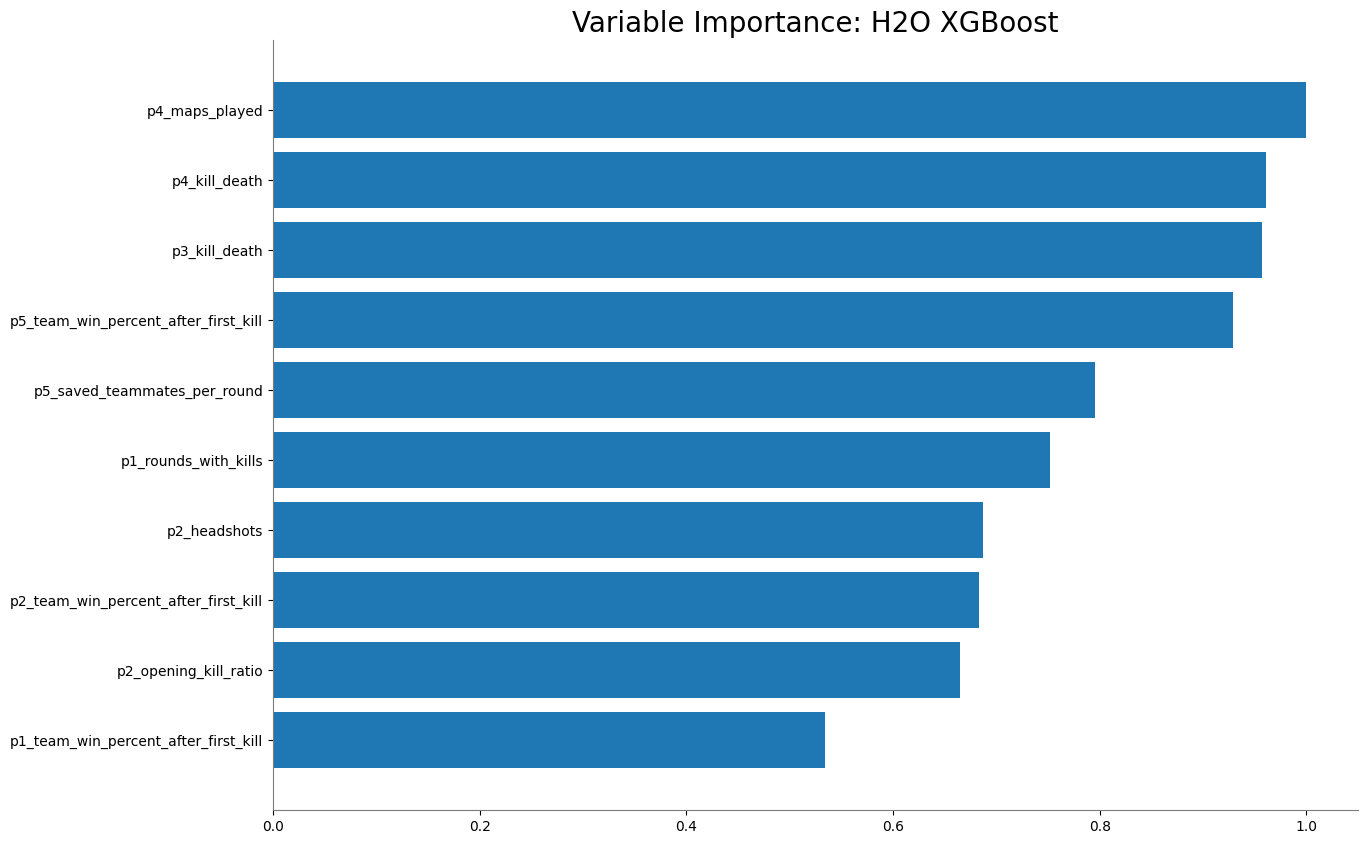

<Figure size 640x480 with 0 Axes>

In [251]:
out.varimp_plot()